<a href="https://colab.research.google.com/github/ivanbaybuza/code-base/blob/master/Thesis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive',force_remount=True)
    %cd '/content/drive/MyDrive/Thesis/Final_Code'
except:
    pass

Mounted at /content/drive
/content/drive/MyDrive/Thesis/Final_Code


In [2]:
!pip install einops

In [3]:
!pip install empyrical

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for empyrical: filename=empyrical-0.5.5-cp37-none-any.whl size=39764 sha256=6c0d30a3ef50f60ede50eab4e7e9f69479ccc09c67a801296d88f3acb7c544f4
  Stored in directory: /root/.cache/pip/wheels/ea/b2/c8/6769d8444d2f2e608fae2641833110668d0ffd1abeb2e9f3fc
Successfully built empyrical


In [4]:
from utils import *
from Network import *

#%matplotlib notebook
import matplotlib.pyplot as plt

#hyperparams
from IPython import display
import numpy as np
import random
import matplotlib.pyplot as plt
params = {'text.usetex' : False,
          'font.size' : 16,
          }
plt.rcParams.update(params)
import matplotlib.dates as mdates


import torch
import torch.nn as nn
import torch.nn.functional as F
from einops import rearrange

import torchvision
import torch
from torchvision import transforms

import time
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

from pandas_datareader import data as pdr
import pandas as pd
from empyrical import max_drawdown, cum_returns, annual_return, annual_volatility, simple_returns, sharpe_ratio, sortino_ratio, cum_returns_final

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import os

from pyolps import utils
from pyolps.strategy import *

In [5]:
def make_deterministic(seed=42):    
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    

In [6]:
make_deterministic()

In [7]:
SP_500_exclude = ['AGN', 'BBT','BF.B', 'BHGE', 'BRK.B', 'CBS', 'CELG', 'CTL', 'CXO', 'ETFC', 
 'HCP', 'JEC', 'MYL', 'NBL','RTN', 'STI', 'SYMC', 'TIF', 'TSS', 'UTX', 'VIAB', 'WCG',
 'ABBV', 'ALLE', 'AMCR', 'ANET', 'APTV', 'ARNC', 'CBOE', 'CFG', 'CHTR',
       'COTY', 'CPRI', 'CTVA', 'DOW', 'FANG', 'FB', 'FBHS', 'FLT', 'FOXA',
       'FRC', 'FTV', 'GM', 'HCA', 'HII', 'HLT', 'HPE', 'INFO', 'IQV', 'IR',
       'KEYS', 'KHC', 'KMI', 'LW', 'LYB', 'MPC', 'NCLH', 'NLSN', 'NWS', 'PSX',
       'PYPL', 'QRVO', 'SYF', 'TRIP', 'TWTR', 'UA', 'WRK', 'XYL', 'ZTS']

SP_500_TICKER = [
    "A",
    "AAL",
    "AAP",
    "AAPL",
    "ABC",
    "ABMD",
    "ABT",
    "ACN",
    "ADBE",
    "ADI",
    "ADM",
    "ADP",
    "ADS",
    "ADSK",
    "AEE",
    "AEP",
    "AES",
    "AFL",
    "AIG",
    "AIV",
    "AIZ",
    "AJG",
    "AKAM",
    "ALB",
    "ALGN",
    "ALK",
    "ALL",
    "ALXN",
    "AMAT",
    "AMD",
    "AME",
    "AMG",
    "AMGN",
    "AMP",
    "AMT",
    "AMZN",
    "ANSS",
    "ANTM",
    "AON",
    "AOS",
    "APA",
    "APD",
    "APH",
    "ARE",
    "ATO",
    "ATVI",
    "AVB",
    "AVGO",
    "AVY",
    "AWK",
    "AXP",
    "AZO",
    "BA",
    "BAC",
    "BAX",
    "BBY",
    "BDX",
    "BEN",
    "BIIB",
    "BK",
    "BKNG",
    "BLK",
    "BLL",
    "BMY",
    "BR",
    "BSX",
    "BWA",
    "BXP",
    "C",
    "CAG",
    "CAH",
    "CAT",
    "CB",
    "CBRE",
    "CCI",
    "CCL",
    "CDNS",
    "CE",
    "CERN",
    "CF",
    "CHD",
    "CHRW",
    "CI",
    "CINF",
    "CL",
    "CLX",
    "CMA",
    "CMCSA",
    "CME",
    "CMG",
    "CMI",
    "CMS",
    "CNC",
    "CNP",
    "COF",
    "COG",
    "COO",
    "COP",
    "COST",
    "CPB",
    "CPRT",
    "CRM",
    "CSCO",
    "CSX",
    "CTAS",
    "CTSH",
    "CTXS",
    "CVS",
    "CVX",
    "D",
    "DAL",
    "DD",
    "DE",
    "DFS",
    "DG",
    "DGX",
    "DHI",
    "DHR",
    "DIS",
    "DISCK",
    "DISH",
    "DLR",
    "DLTR",
    "DOV",
    "DRE",
    "DRI",
    "DTE",
    "DUK",
    "DVA",
    "DVN",
    "DXC",
    "EA",
    "EBAY",
    "ECL",
    "ED",
    "EFX",
    "EIX",
    "EL",
    "EMN",
    "EMR",
    "EOG",
    "EQIX",
    "EQR",
    "ES",
    "ESS",
    "ETN",
    "ETR",
    "EVRG",
    "EW",
    "EXC",
    "EXPD",
    "EXPE",
    "EXR",
    "F",
    "FAST",
    "FCX",
    "FDX",
    "FE",
    "FFIV",
    "FIS",
    "FISV",
    "FITB",
    "FLIR",
    "FLS",
    "FMC",
    "FRT",
    "FTI",
    "FTNT",
    "GD",
    "GE",
    "GILD",
    "GIS",
    "GL",
    "GLW",
    "GOOG",
    "GPC",
    "GPN",
    "GPS",
    "GRMN",
    "GS",
    "GWW",
    "HAL",
    "HAS",
    "HBAN",
    "HBI",
    "HD",
    "HES",
    "HFC",
    "HIG",
    "HOG",
    "HOLX",
    "HON",
    "HP",
    "HPQ",
    "HRB",
    "HRL",
    "HSIC",
    "HST",
    "HSY",
    "HUM",
    "IBM",
    "ICE",
    "IDXX",
    "IEX",
    "IFF",
    "ILMN",
    "INCY",
    "INTC",
    "INTU",
    "IP",
    "IPG",
    "IPGP",
    "IRM",
    "ISRG",
    "IT",
    "ITW",
    "IVZ",
    "JBHT",
    "JCI",
    "JEF",
    "JKHY",
    "JNJ",
    "JNPR",
    "JPM",
    "JWN",
    "K",
    "KEY",
    "KIM",
    "KLAC",
    "KMB",
    "KMX",
    "KO",
    "KR",
    "KSS",
    "KSU",
    "L",
    "LB",
    "LDOS",
    "LEG",
    "LEN",
    "LH",
    "LHX",
    "LIN",
    "LKQ",
    "LLY",
    "LMT",
    "LNC",
    "LNT",
    "LOW",
    "LRCX",
    "LUV",
    "M",
    "MA",
    "MAA",
    "MAC",
    "MAR",
    "MAS",
    "MCD",
    "MCHP",
    "MCK",
    "MCO",
    "MDLZ",
    "MDT",
    "MET",
    "MGM",
    "MHK",
    "MKC",
    "MKTX",
    "MLM",
    "MMC",
    "MMM",
    "MNST",
    "MO",
    "MOS",
    "MRK",
    "MRO",
    "MS",
    "MSCI",
    "MSFT",
    "MSI",
    "MTB",
    "MTD",
    "MU",
    "MXIM",
    "NDAQ",
    "NEE",
    "NEM",
    "NFLX",
    "NI",
    "NKE",
    "NKTR",
    "NOC",
    "NOV",
    "NRG",
    "NSC",
    "NTAP",
    "NTRS",
    "NUE",
    "NVDA",
    "NWL",
    "O",
    "OI",
    "OKE",
    "OMC",
    "ORCL",
    "ORLY",
    "OXY",
    "PAYX",
    "PBCT",
    "PCAR",
    "PEG",
    "PEP",
    "PFE",
    "PFG",
    "PG",
    "PGR",
    "PH",
    "PHM",
    "PKG",
    "PKI",
    "PLD",
    "PM",
    "PNC",
    "PNR",
    "PNW",
    "PPG",
    "PPL",
    "PRGO",
    "PRU",
    "PSA",
    "PVH",
    "PWR",
    "PXD",
    "QCOM",
    "RCL",
    "RE",
    "REG",
    "REGN",
    "RF",
    "RHI",
    "RJF",
    "RL",
    "RMD",
    "ROK",
    "ROL",
    "ROP",
    "ROST",
    "RSG",
    "SBAC",
    "SBUX",
    "SCHW",
    "SEE",
    "SHW",
    "SIVB",
    "SJM",
    "SLB",
    "SLG",
    "SNA",
    "SNPS",
    "SO",
    "SPG",
    "SPGI",
    "SRE",
    "STT",
    "STX",
    "STZ",
    "SWK",
    "SWKS",
    "SYK",
    "SYY",
    "T",
    "TAP",
    "TDG",
    "TEL",
    "TFX",
    "TGT",
    "TJX",
    "TMO",
    "TMUS",
    "TPR",
    "TROW",
    "TRV",
    "TSCO",
    "TSN",
    "TTWO",
    "TXN",
    "TXT",
    "UAL",
    "UDR",
    "UHS",
    "ULTA",
    "UNH",
    "UNM",
    "UNP",
    "UPS",
    "URI",
    "USB",
    "V",
    "VAR",
    "VFC",
    "VLO",
    "VMC",
    "VNO",
    "VRSK",
    "VRSN",
    "VRTX",
    "VTR",
    "VZ",
    "WAB",
    "WAT",
    "WBA",
    "WDC",
    "WEC",
    "WELL",
    "WFC",
    "WHR",
    "WLTW",
    "WM",
    "WMB",
    "WMT",
    "WU",
    "WY",
    "WYNN",
    "XEC",
    "XEL",
    "XLNX",
    "XOM",
    "XRAY",
    "XRX",
    "YUM",
    "ZBH",
    "ZION",
]


In [8]:
NAS_exclude = ['FB', 'TSLA', 'CHTR', 'KHC', 'JD', 'PYPL', 'CDW', 'WDAY', 'NXPI']

NAS_100_TICKER = [
    "AMGN",
    "AAPL",
    "AMAT",
    "INTC",
    "PCAR",
    "PAYX",
    "MSFT",
    "ADBE",
    "CSCO",
    "XLNX",
    "QCOM",
    "COST",
    "SBUX",
    "FISV",
    "CTXS",
    "INTU",
    "AMZN",
    "EBAY",
    "BIIB",
    "CHKP",
    "GILD",
    "NLOK",
    "CMCSA",
    "FAST",
    "ADSK",
    "CTSH",
    "NVDA",
    "GOOGL",
    "ISRG",
    "VRTX",
    "HSIC",
    "BIDU",
    "ATVI",
    "ADP",
    "ROST",
    "ORLY",
    "CERN",
    "BKNG",
    "MU",
    "DLTR",
    "ALXN",
    "SIRI",
    "MNST",
    "AVGO",
    "TXN",
    "MDLZ",
    "ADI",
    "WDC",
    "REGN",
    "LBTYK",
    "VRSK",
    "NFLX",
    "MAR",
    "ILMN",
    "LRCX",
    "EA",
    "AAL",
    "WBA",
    "BMRN",
    "SWKS",
    "INCY",
    "MXIM",
    "TMUS",
    "EXPE",
    "TCOM",
    "ULTA",
    "CSX",
    "NTES",
    "MCHP",
    "CTAS",
    "KLAC",
    "HAS",
    "JBHT",
    "IDXX",
    "WYNN",
    "MELI",
    "ALGN",
    "CDNS",
    "SNPS",
    "ASML",
    "TTWO",
    "PEP",
    "XEL",
    "AMD",
    "NTAP",
    "VRSN",
    "LULU",
    "WLTW",
    "UAL",
]

In [9]:
#Russian_TICKER = ['AFKS.ME', 'AFLT.ME', 'ALRS.ME', 'GAZP.ME', 'SBER.ME',  'ROSN.ME',  'PLZL.ME', 'TATN.ME']
Russian_TICKER = ['SBRCY', 'OJSCY', 'OGZPY', 'YNDX']

In [10]:
DOW_30_TICKER = ["AAPL","MSFT","JPM","V","RTX","PG","GS","NKE","DIS","AXP","HD","INTC","WMT",
    "IBM",
    "MRK",
    "UNH",
    "KO",
    "CAT",
    "TRV",
    "JNJ",
    "CVX",
    "MCD",
    "VZ",
    "CSCO",
    "XOM",
    "BA",
    "MMM",
    "PFE",
    "WBA",
    "DD",
]

DOW_3_TICKER = [
    "AAPL",
    "MSFT",
    "JPM",
]

AAPL_TICKER = [
    "AAPL",
]

start_DOW = '2010-01-01'
end_DOW = '2021-01-05'
interval='d'

tics = DOW_30_TICKER
start_RUSSIA = '2014-01-01'
end_RUSSIA = '2021-01-05'
interval='d'

data = pdr.get_data_yahoo(tics, start = start_DOW, end = end_DOW, interval = interval).reset_index()

In [11]:
data.isna().any()[lambda x: x]

Series([], dtype: bool)

In [12]:
def BollingerBands(data, tics, window, k):

    for i in tics:

        data[('BollingerBands_upper', i)] = data[('Adj Close', i)].rolling(window).mean() + k*data[('Adj Close', i)].rolling(window).std()

    for i in tics:

        data[('BollingerBands_lower', i)] = data[('Adj Close', i)].rolling(window).mean() - k*data[('Adj Close', i)].rolling(window).std()

    return data

def MACD(data, tics, window_long, window_short):

    for i in tics:

        data[('MACD', i)] = data[('Adj Close', i)].rolling(window_short).mean() - data[('Adj Close', i)].rolling(window_long).mean()

    return data

In [13]:
def Preprocessing(data, tics):
  
  data = data.drop(columns = 'Close')
  #data = data.drop(columns= 'Date')

  for name in ['Adj Close', 'High', 'Low', 'Open', 'Volume']:
    
    data[name] = data[name].pct_change()
    #data[name] = data[name].apply(lambda x: np.log(1+x))
  
  data = data.drop(index = 0)

  data = MACD(data, tics, 26, 12)
  data = BollingerBands(data, tics, 20, 2)
  data = data[26:]

  return data


In [14]:
data = Preprocessing(data, tics)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
data.replace([np.inf, -np.inf], 0, inplace=True)

In [16]:
n_timesteps, n_assets  = data['Adj Close'].shape
window = 10
 

def indices(n_timesteps, test_part, val_part):
  
    split_ix_tr = int(n_timesteps * test_part)
    split_ix_val = int(n_timesteps * val_part)
    indices_train = list(range(split_ix_tr))
    indices_val = list(range(split_ix_tr, split_ix_val + split_ix_tr))
    indices_test = list(range(split_ix_val + split_ix_tr, n_timesteps))

    return indices_train, indices_val, indices_test

indices_train, indices_val, indices_test = indices(n_timesteps, 0.7, 0.15)

In [17]:
scaler_X = StandardScaler()
X = data.drop(columns = 'Date').values
scaler_X.fit(X[indices_train[0]:indices_train[-1]])
X = scaler_X.transform(X)

scaler_y = StandardScaler()
y = data['Adj Close'].values
scaler_y.fit(y[indices_train[0]:indices_train[-1]])
y = scaler_y.transform(y)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [18]:
class TimeseriesDataset(torch.utils.data.Dataset):   
    def __init__(self, X, y, seq_len=1):
        self.X = X
        self.y = y
        self.seq_len = seq_len

    def __len__(self):
        return self.X.__len__() - (self.seq_len)

    def __getitem__(self, index):
        return (torch.FloatTensor(self.X[index:index+self.seq_len]), torch.FloatTensor(self.y[index+self.seq_len]))

In [19]:
def loader(X, y, indices, window, batch_size = 1, shuffle = False):
  
    X = X[indices[0]:indices[-1]+1]
    y = y[indices[0]:indices[-1]+1]
    dataset = TimeseriesDataset(X, y, window)
    loader = torch.utils.data.DataLoader(dataset, batch_size, shuffle, num_workers = 0)

    return loader

In [20]:
batch_size_train = 512
batch_size_val = 256
batch_size_test = 1

train_loader = loader(X, y, indices_train, window, batch_size_train, shuffle = False)
val_loader = loader(X, y, indices_val, window,batch_size_val)
test_loader = loader(X, y, indices_test, window,batch_size_test)

In [21]:
class RNN(torch.nn.Module):
    def __init__(self,n_features,seq_length, n_hidden, n_layers, output_length):
        super(RNN, self).__init__()
        self.n_features = n_features
        self.seq_len = seq_length
        self.n_hidden = n_hidden # number of hidden states
        self.n_layers = n_layers # number of RNN layers (stacked)
        self.output_length = output_length
    
        self.l_rnn = torch.nn.RNN(input_size = n_features, 
                                 hidden_size = self.n_hidden,
                                 num_layers = self.n_layers, 
                                 batch_first = True)
        # according to pytorch docs RNN output is 
        # (batch_size,seq_len, num_directions * hidden_size)
        # when considering batch_first = True
        self.l_linear = torch.nn.Linear(self.n_hidden*self.seq_len, self.output_length)
        

    
    def forward(self, x):        
        batch_size, _, _ = x.size()
        
        rnn_out, self.hidden = self.l_rnn(x)
        # lstm_out(with batch_first = True) is 
        # (batch_size,seq_len,num_directions * hidden_size)
        # for following linear layer we want to keep batch_size dimension and merge rest       
        # .contiguous() -> solves tensor compatibility error
        x = rnn_out.contiguous().view(batch_size,-1)
        return self.l_linear(x)

In [22]:
class LSTM(torch.nn.Module):
    def __init__(self,n_features,seq_length, n_hidden, n_layers, output_length):
        super(LSTM, self).__init__()
        self.n_features = n_features
        self.seq_len = seq_length
        self.n_hidden = n_hidden # number of hidden states
        self.n_layers = n_layers # number of LSTM layers (stacked)
        self.output_length = output_length
    
        self.l_lstm = torch.nn.LSTM(input_size = n_features, 
                                 hidden_size = self.n_hidden,
                                 num_layers = self.n_layers, 
                                 batch_first = True)
        # according to pytorch docs LSTM output is 
        # (batch_size,seq_len, num_directions * hidden_size)
        # when considering batch_first = True
        self.l_linear = torch.nn.Linear(self.n_hidden*self.seq_len, self.output_length)
        

    
    def forward(self, x):        
        batch_size, _, _ = x.size()
        
        lstm_out, self.hidden = self.l_lstm(x)
        # lstm_out(with batch_first = True) is 
        # (batch_size,seq_len,num_directions * hidden_size)
        # for following linear layer we want to keep batch_size dimension and merge rest       
        # .contiguous() -> solves tensor compatibility error
        x = lstm_out.contiguous().view(batch_size,-1)
        return self.l_linear(x)

In [23]:
def simplex_projection(v, b=1):

    if b < 0:
        print('Radius of simplex is negative: %2.3f\n', b)
        return None

    v = (v > 0) * v
    u = np.sort(v)[::-1]
    sv = np.cumsum(u)
    z = (u > (sv - b) / range(1, len(u) + 1))
    non_neg_indices = np.argwhere(z != 0)
    if len(non_neg_indices):
        rho = non_neg_indices[-1, -1]   
    else:
        rho = 0
    theta = np.maximum(0, (sv[rho] - b) / (rho + 1))
    return np.maximum(v - theta, 0)


def olmar_onestep(epsilon, y_pred, weight_o):


    ell = max([0, epsilon - y_pred @ weight_o])
    x_bar = np.mean(y_pred)    
    denom_part = y_pred - x_bar
    denominator = np.dot(denom_part, denom_part)
    if denominator != 0:
        lmbd = ell / denominator
    else:

        lmbd = 0

    weight = weight_o + lmbd * (y_pred - x_bar)
    weight = simplex_projection(weight)
    
    return weight / sum(weight)

def OLMAR(epsilon, y_pred, weight_o):

    weight = []
    for i in range(len(y_pred)):

        weight_new = olmar_onestep(epsilon, y_pred[i], weight_o)
        weight_o = weight_new
        weight.append(weight_new)

    weight = np.array(weight)

    return(weight)

def MAR(data, window):

    T, N = data.shape
    
    y_pred = np.zeros([T-window,N])
    tmp_x = np.ones([T-window,N])
    for i in range(1, window+1):
      y_pred = y_pred + 1. / tmp_x
      tmp_x = tmp_x * (data[window-i:T-i] + 1)
    y_pred /= window

    return y_pred

In [24]:
#https://gist.github.com/jamesr2323/33c67ba5ac29880171b63d2c7f1acdc5
class RMSELoss(torch.nn.Module):
    def __init__(self):
        super(RMSELoss,self).__init__()

    def forward(self,x,y):
        eps = 1e-8
        criterion = nn.MSELoss()
        loss = torch.sqrt(criterion(x, y) + eps)
        return loss

In [25]:
def adjust_learning_rate(optimizer, learning_rate, epoch, lradj='type1',ratio=0.95):
    # lr = args.learning_rate * (0.2 ** (epoch // 2))
    if lradj=='type1':
        lr_adjust = {epoch: learning_rate * (ratio ** ((epoch-1) // 1))}
    elif lradj=='type2':
        lr_adjust = {
            2: 5e-5, 4: 1e-5, 6: 5e-6, 8: 1e-6, 
            10: 5e-7, 15: 1e-7, 20: 5e-8
        }
    if epoch in lr_adjust.keys():
        lr = lr_adjust[epoch]
        for param_group in optimizer.param_groups:
            param_group['lr'] = lr
        print('Updating learning rate to {}'.format(lr))

In [26]:
def plot_loss_and_accuracy(loss_history, train_accuracy, val_accuracy, clear_output=True):
    if clear_output:
        display.clear_output(wait=True)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6),facecolor='white')
    if loss_history:
        ax[0].semilogy(loss_history)
        ax[0].set_title(f'Training {loss_name}')
        ax[0].set_xlabel('# batches processed')
        ax[0].set_ylabel('loss value')
    
    if len(train_accuracy) > 0:
        ax[1].plot(train_accuracy, '*-b', label='train')
        ax[1].plot(val_accuracy, '*-r', label='val')
        ax[1].set_title(f'Mean {loss_name}')
        ax[1].legend()
        ax[1].set_xlabel('# epochs processed')
        ax[1].set_ylabel('Loss value')
    
    plt.show()

In [27]:
def train(model, device, criterion, opt, num_epochs, lr, train_loader, val_loader,accumulation_steps=2):
    
    train_loss = []
    train_accuracy = []
    val_accuracy = []
    model.zero_grad()
    for epoch in range(num_epochs):
        model.train(True) 

        train_accuracy_batch = []

        for batch_no, (X_batch, y_batch) in tqdm(enumerate(train_loader), 
                                                 total=len(train_loader)):
          
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)      

            y_pred_batch = model(X_batch)

            loss = criterion(y_pred_batch, y_batch)
        
            # optimize
            opt.zero_grad()
            loss.backward()
            opt.step()
            
            train_loss.append(loss.item())
            train_accuracy_batch.append(loss.item())

            if batch_no % 15 == 0:
                plot_loss_and_accuracy(train_loss, train_accuracy, val_accuracy, clear_output=True)
                
        train_accuracy_overall = np.mean(train_accuracy_batch)
        train_accuracy.append(train_accuracy_overall.item())


        model.train(False) 
        val_accuracy_batch = []
        for X_batch, y_batch in tqdm(val_loader):
            
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)           
            y_pred_batch = model(X_batch)
            accuracy = criterion(y_pred_batch, y_batch)
            #accuracy = compute_accuracy(y_pred_batch, y_batch, device=device)
            val_accuracy_batch.append(accuracy.item())

        val_accuracy_overall = np.mean(val_accuracy_batch)
        val_accuracy.append(val_accuracy_overall.item())

        adjust_learning_rate(opt, lr, epoch)

In [28]:
dec_seq_len = 1
enc_seq_len = window - dec_seq_len 
output_sequence_length = n_assets
input_size = X.shape[1]

dim_val = 10
dim_attn = 64
n_heads = 3

n_decoder_layers = 3
n_encoder_layers = 3

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(enc_seq_len,dec_seq_len)

9 1


In [29]:
print(device)

cpu


In [30]:
transform = Transformer(dim_val, dim_attn, input_size, dec_seq_len,  
                    output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads).to(device)



#model = InformerTransformer(dim_val, dim_attn, input_size, dec_seq_len,  
#                    output_sequence_length, n_decoder_layers, n_encoder_layers, n_heads).to(device)

lr = 1e-3
criterion =  nn.MSELoss()
opt = torch.optim.Adam(transform.parameters(), lr=lr,weight_decay=1e-3)
#opt = torch.optim.SGD(model.parameters(), lr=lr,weight_decay=1e-3,momentum=0.999)

num_epochs = 35

In [31]:
loss_name = criterion.__class__.__name__

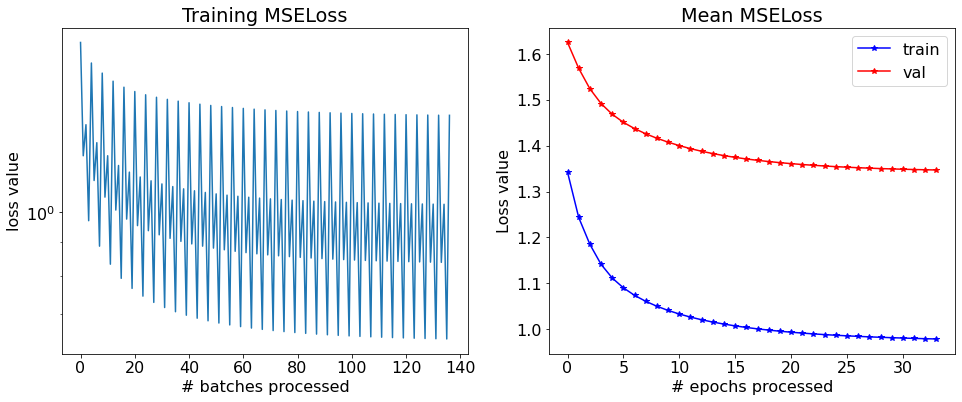

100%|██████████| 2/2 [00:00<00:00, 23.71it/s]

Updating learning rate to 0.00018402591023557584


In [32]:
train(transform, device, criterion, opt, num_epochs, lr, train_loader, val_loader)

In [33]:
transform.eval();

In [34]:
lr = 1e-3
criterion =  nn.MSELoss()

n_features = data.shape[1] - 1
seq_length = window
n_hidden = 64
output_length = n_assets
n_layers = 3 

lstm = LSTM(n_features, seq_length, n_hidden, n_layers, output_length).to(device)

opt = torch.optim.Adam(lstm.parameters(), lr=lr,weight_decay=1e-3)

num_epochs = 20

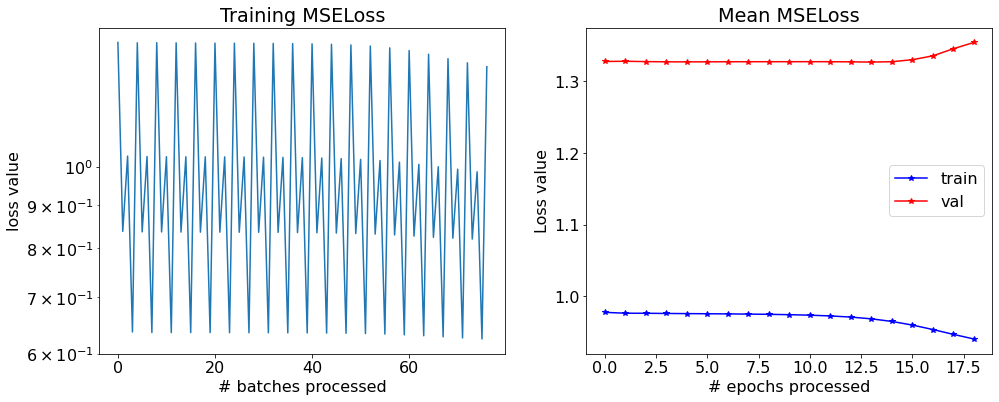

100%|██████████| 2/2 [00:00<00:00, 33.84it/s]

Updating learning rate to 0.0003972143184582182


In [35]:
train(lstm, device, criterion, opt, num_epochs, lr, train_loader, val_loader)

In [36]:
lstm.eval();

In [37]:
lr = 1e-3
criterion =  nn.MSELoss()

n_features = data.shape[1] - 1
seq_length = window
n_hidden = 64
output_length = n_assets
n_layers = 3 

rnn = RNN(n_features, seq_length, n_hidden, n_layers, output_length).to(device)

opt = torch.optim.Adam(rnn.parameters(), lr=lr,weight_decay=1e-3)

num_epochs = 30

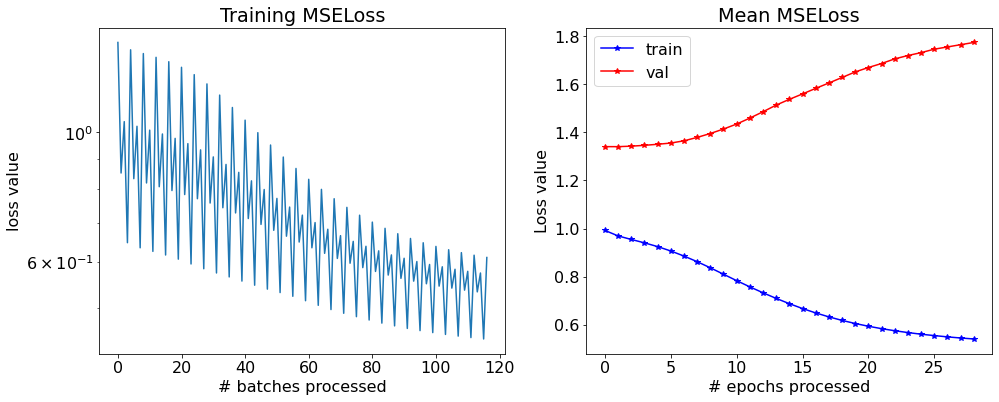

100%|██████████| 2/2 [00:00<00:00, 65.55it/s]

Updating learning rate to 0.00023782688525533216


In [38]:
train(rnn, device, criterion, opt, num_epochs, lr, train_loader, val_loader)

In [39]:
def Predict_Y(loader, model, scaler):
  
    y_true = []
    y_pred = []
  
    for batch in loader:

        X,Y = batch[:2]
        X = X.to(device)
        Y = Y.to(device)
        y_true.append(scaler.inverse_transform(Y.cpu().detach().numpy()))
        y_pred.append(scaler.inverse_transform(model(X).cpu().detach().numpy()))
    
    y_true = np.vstack(y_true)
    y_pred = np.vstack(y_pred)

    return y_true, y_pred

In [40]:
y_OLMAR = MAR(data['Adj Close'].values , 10) - 1

y_test_true,  y_test_Transformer = Predict_Y(test_loader, transform, scaler_y)
_,  y_test_LSTM = Predict_Y(test_loader, lstm, scaler_y)
_,  y_test_RNN = Predict_Y(test_loader, rnn, scaler_y)
y_test_OLMAR = y_OLMAR[-len(y_test_true):]
#test_dates = data['Date'][indices_test].values[window:]


weight_o = np.ones((n_assets)) / n_assets
epsilon = 0.01

weigth_test_OLMAR = OLMAR(epsilon, y_test_OLMAR, weight_o)
weigth_test_Transformer = OLMAR(epsilon, y_test_Transformer, weight_o)
weigth_test_LSTM = OLMAR(epsilon, y_test_LSTM, weight_o)
weigth_test_RNN = OLMAR(epsilon, y_test_RNN, weight_o)



daily_returns_OLMAR = (weigth_test_OLMAR * y_test_true).sum(axis = 1)
daily_returns_Transformer = (weigth_test_Transformer * y_test_true).sum(axis = 1)
daily_returns_LSTM = (weigth_test_LSTM * y_test_true).sum(axis = 1)
daily_returns_RNN = (weigth_test_RNN * y_test_true).sum(axis = 1)
daily_returns_BAH = y_test_true.mean(axis = 1)


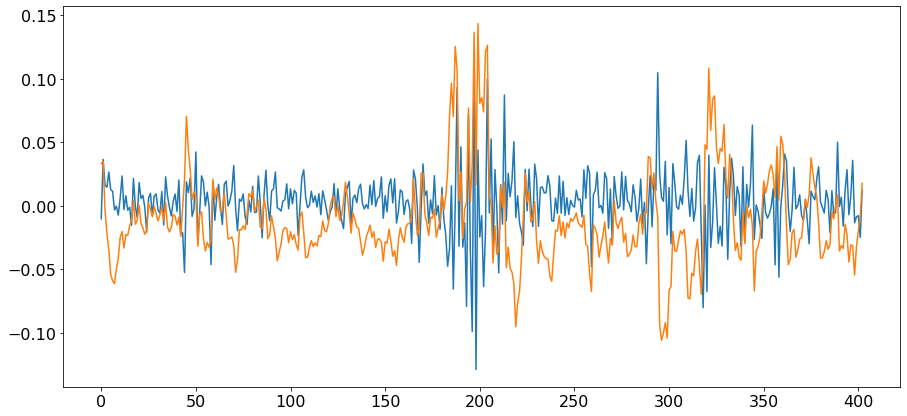

In [41]:
plt.figure(figsize=[15, 7])
plt.plot(y_test_true[:, 0])
plt.plot(y_test_OLMAR[:, 0])
plt.show()

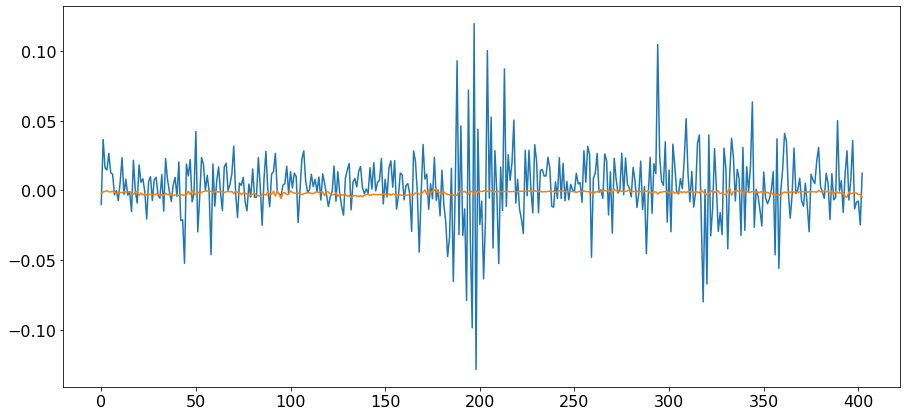

In [42]:
plt.figure(figsize=[15, 7])
plt.plot(y_test_true[:, 0])
plt.plot(y_test_Transformer[:, 0])
plt.show()

In [43]:
opts = []
cum_ret_Anticor, cumprod_ret_Anticor, daily_returns_Anticor, weigth_test_Anticor, exp_ret = anticor.anticor_run(data['Adj Close'].values + 1, 0, opts, window=30, verbose=False)

daily_returns_Anticor = daily_returns_Anticor[-len(y_test_true):] - 1

100%|██████████| 2744/2744 [00:45<00:00, 60.59it/s]


In [44]:
opts = []
cum_ret, cumprod_ret, daily_returns_EG, weigth_test_EG = eg.eg_run(data['Adj Close'].values[-len(y_test_true):] + 1, 0, opts, eta=0.05, verbose=False)

daily_returns_EG = daily_returns_EG - 1

100%|██████████| 403/403 [00:00<00:00, 16318.20it/s]


In [45]:
def Result_Table(Daily_Returns, metrics):

  table = np.zeros(shape = (len(metrics), len(Daily_Returns)))

  for i, model in enumerate(Daily_Returns):

    for j, metric in enumerate(metrics):

      table[j, i] = round(metric(model), 3)

  table = pd.DataFrame(table, index= ['Cumulative Return', 'Annual Return', 'Sharpe Ratio', 'Sortino Ratio', 'Annual Volatility', 'Max Drowdown'],
                       columns= ['BAH', 'EG', 'Anticor', 'OLMAR', 'Transformer', 'LSTM', 'RNN'])
#  table.style.format({'Cumulative Return': "{:.2%}"})
#table.style.format({'Transformer': "{:.2%}"})
  table=table.transpose()
  table = table.style.format({'Annual Volatility': "{:.2%}", 'Max Drowdown': "{:.2%}", 'Cumulative Return': "{:.2%}",
                     'Annual Return': "{:.2%}", 'Sharpe Ratio': "{:.2}", 'Sortino Ratio': "{:.2}"})                      
#  table=table.transpose()
  return table


In [46]:
Daily_Returns = [daily_returns_BAH, daily_returns_EG, daily_returns_Anticor, daily_returns_OLMAR,
                 daily_returns_Transformer,  daily_returns_LSTM, daily_returns_RNN]
metrics = [cum_returns_final, annual_return, sharpe_ratio, sortino_ratio, annual_volatility, max_drawdown]

table = Result_Table(Daily_Returns, metrics)

In [47]:
table.background_gradient()

,Cumulative Return,Annual Return,Sharpe Ratio,Sortino Ratio,Annual Volatility,Max Drowdown
BAH,26.50%,15.80%,0.65,0.91,29.60%,-35.00%
EG,26.40%,15.80%,0.65,0.91,29.50%,-34.90%
Anticor,8.90%,5.50%,0.34,0.49,43.50%,-56.20%
OLMAR,33.40%,19.70%,0.78,1.1,28.20%,-35.60%
Transformer,62.50%,35.50%,1.1,1.6,33.30%,-39.00%
LSTM,52.60%,30.20%,0.94,1.4,34.20%,-32.10%
RNN,59.40%,33.80%,1.2,1.8,28.10%,-26.20%


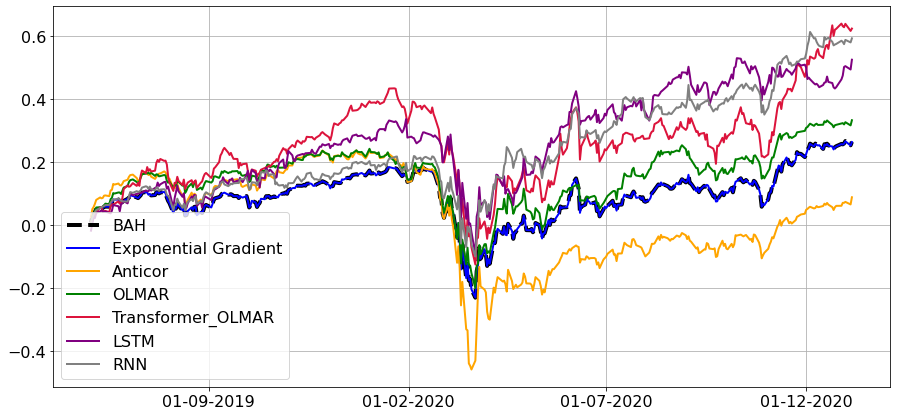

In [48]:
plt.figure(figsize=(15,7),facecolor='white')
fig = plt.gcf()
ax = plt.gca()
# set formatter
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
test_dates = data['Date'][-len(y_test_true):]

plt.plot(test_dates,cum_returns(daily_returns_BAH), label = 'BAH',linestyle='--',color='black', lw= 4)
plt.plot(test_dates,cum_returns(daily_returns_EG), label = 'Exponential Gradient',color='blue',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_Anticor), label = 'Anticor',color='orange',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_OLMAR), label = 'OLMAR',color='green',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_Transformer), label = 'Transformer_OLMAR',color='crimson',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_LSTM), label = 'LSTM',color='purple',lw=2)
plt.plot(test_dates,cum_returns(daily_returns_RNN), label = 'RNN',color='gray',lw=2)

plt.legend()
plt.grid()
plt.show()

In [49]:
#torch.save(rnn, '/content/drive/MyDrive/Thesis/Final_Code/Nets/RNN_Nasdaq.pt')